In [1]:
%matplotlib inline


# Illustration of transforms

This example illustrates the various transforms available in [torchvision.transforms](https://pytorch.org/vision/stable/transforms.html).

Original source of this Notebook: https://pytorch.org/vision/stable/transforms.html


In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision.transforms as T


# plt.rcParams["savefig.bbox"] = 'tight'
orig_img = Image.open("../static/images/n02085936_Maltese_dog.jpeg")
# if you change the seed, make sure that the randomly-applied transforms
# properly show that the image can be both transformed and *not* transformed!
torch.manual_seed(0)


def plot(imgs, with_orig=True, row_title=None, figsize=(15, 8), **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(
        nrows=num_rows, 
        ncols=num_cols, 
        squeeze=False, 
        figsize=figsize, 
    )
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs) # same as `np.asarray()`
            # ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
            ax.axis("off")
            ax.set(title="{}".format(img.size))

    # if with_orig:
    #     axs[0, 0].set(title='Original image')
    #     axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

# Common Manual Transformations

## Pad
The [`Pad`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Pad) transform
fills image borders with some pixel values.



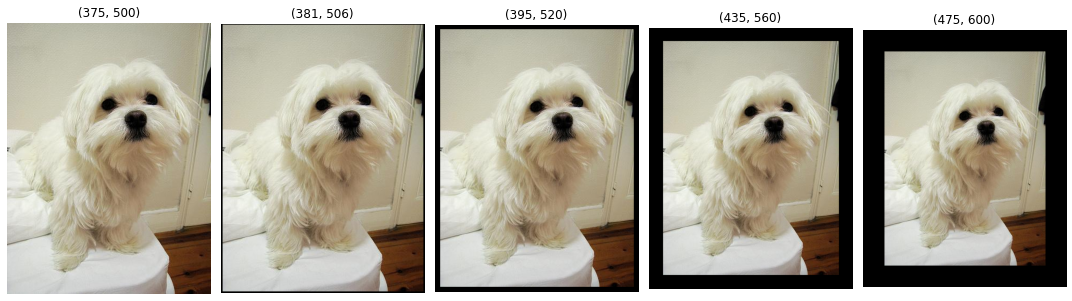

In [3]:
padded_imgs = [T.Pad(padding=padding)(orig_img) for padding in (3, 10, 30, 50)]
plot(padded_imgs)

## Resize
The [`Resize`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Resize) transform
resizes an image.


Parameters:
- `size`: Desired output size. 
  - If size is a sequence like `(h, w)`, output size will be matched to this. 
  - If size is an `int`, smaller edge of the image will be matched to this number. i.e, if `height > width`, then image will be rescaled to `(size * height / width, size)`.



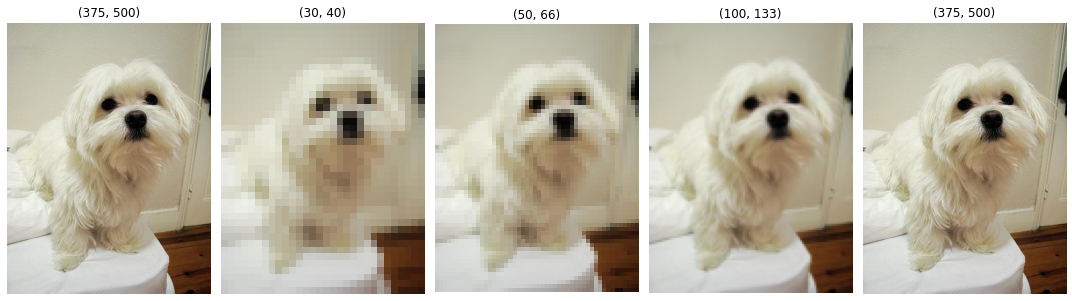

In [4]:
resized_imgs = [
    T.Resize(size=size)(orig_img) 
    for size in (
        30, 50, 100, 
        (orig_img.size[1], orig_img.size[0]) # This is due to Pillow reverse the size order
    )
]
plot(resized_imgs)

## CenterCrop
The [`CenterCrop`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.CenterCrop) transform
crops the given image at the center.



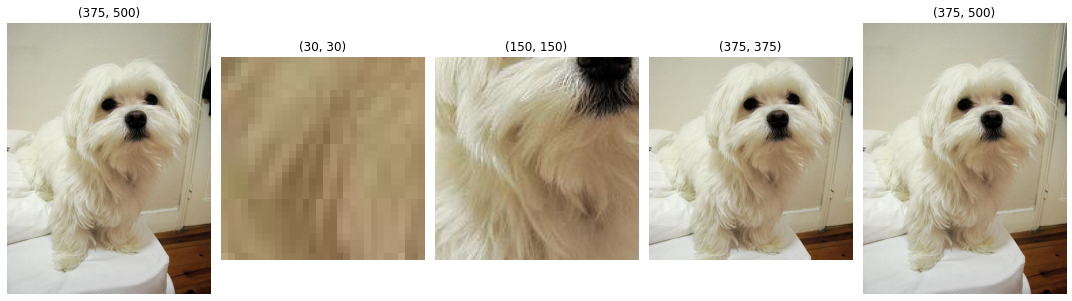

In [5]:
center_crops = [
    T.CenterCrop(size=size)(orig_img) 
    for size in (
        30, 
        150, 
        min(orig_img.size[0], orig_img.size[1]), 
        (orig_img.size[1], orig_img.size[0])
    )
]
plot(center_crops)

## FiveCrop
The [`FiveCrop`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.FiveCrop) transform
crops the given image into four corners and the central crop.



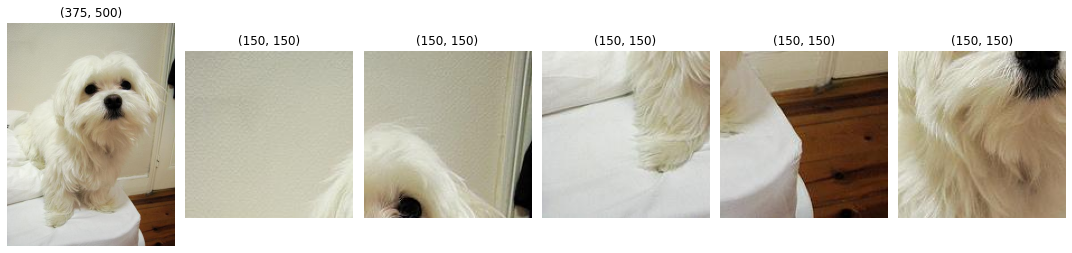

In [6]:
(top_left, top_right, bottom_left, bottom_right, center) = T.FiveCrop(size=(150, 150))(orig_img)
plot([top_left, top_right, bottom_left, bottom_right, center])

## Grayscale
The [`Grayscale`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Grayscale) transform
converts an image to grayscale



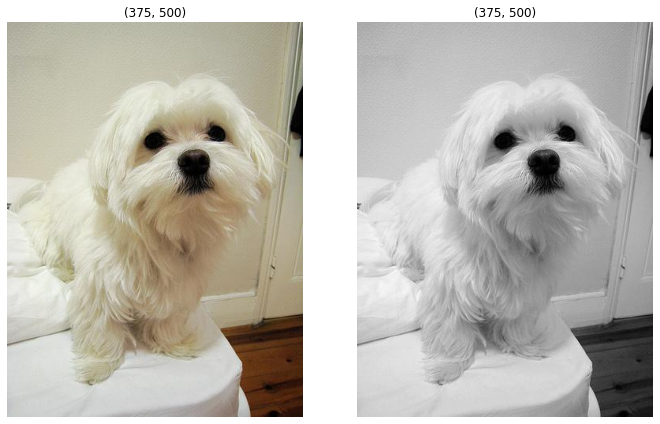

In [7]:
gray_img = T.Grayscale()(orig_img)
plot([gray_img], cmap='gray', figsize=(10, 6))

## Random transforms
The following transforms are random, which means that the same transfomer
instance will produce different result each time it transforms a given image.

### ColorJitter
The [`ColorJitter`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ColorJitter) transform
randomly changes the brightness, saturation, and other properties of an image.

Randomly change the brightness, contrast, saturation and hue of an image.

- brightness (float or tuple of python:float (min, max)) – How much to jitter brightness. brightness_factor is chosen uniformly from [max(0, 1 - brightness), 1 + brightness] or the given [min, max]. Should be non negative numbers.

- contrast (float or tuple of python:float (min, max)) – How much to jitter contrast. contrast_factor is chosen uniformly from [max(0, 1 - contrast), 1 + contrast] or the given [min, max]. Should be non negative numbers.

- saturation (float or tuple of python:float (min, max)) – How much to jitter saturation. saturation_factor is chosen uniformly from [max(0, 1 - saturation), 1 + saturation] or the given [min, max]. Should be non negative numbers.

- hue (float or tuple of python:float (min, max)) – How much to jitter hue. hue_factor is chosen uniformly from [-hue, hue] or the given [min, max]. Should have 0<= hue <= 0.5 or -0.5 <= min <= max <= 0.5.

Simple third-party tool to adjust image color: https://www.gifgit.com/image/color-adjustments

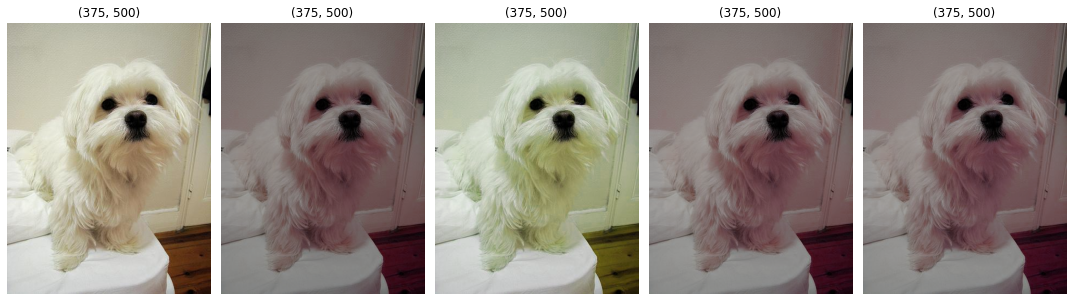

In [8]:
jitter = T.ColorJitter(brightness=.5, hue=.3)
jitted_imgs = [jitter(orig_img) for _ in range(4)]
plot(jitted_imgs)

### GaussianBlur
The [`GaussianBlur`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.GaussianBlur) transform
performs gaussian blur transform on an image.



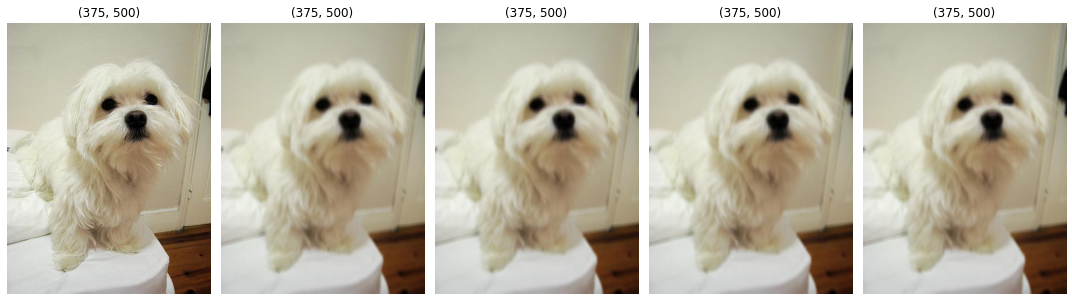

In [9]:
blurrer = T.GaussianBlur(kernel_size=(5, 9), sigma=(0.01, 20))
blurred_imgs = [blurrer(orig_img) for _ in range(4)]
plot(blurred_imgs)

### RandomPerspective
The [`RandomPerspective`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomPerspective) transform
performs random perspective transform on an image.



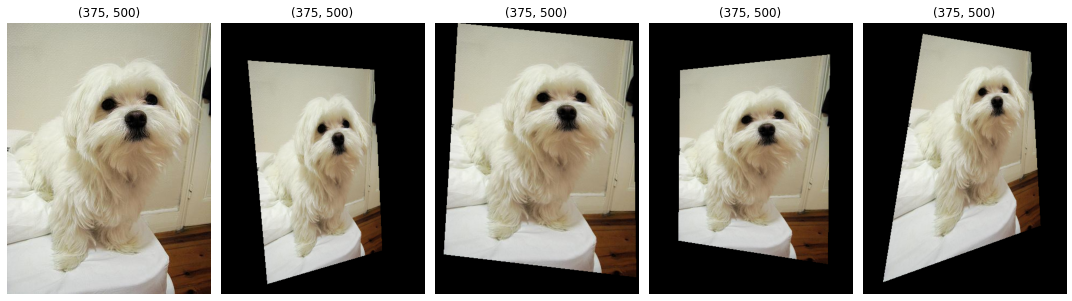

In [10]:
perspective_transformer = T.RandomPerspective(distortion_scale=0.6, p=1.0)
perspective_imgs = [perspective_transformer(orig_img) for _ in range(4)]
plot(perspective_imgs)

### RandomRotation
The [`RandomRotation`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomRotation) transform
rotates an image with random angle.



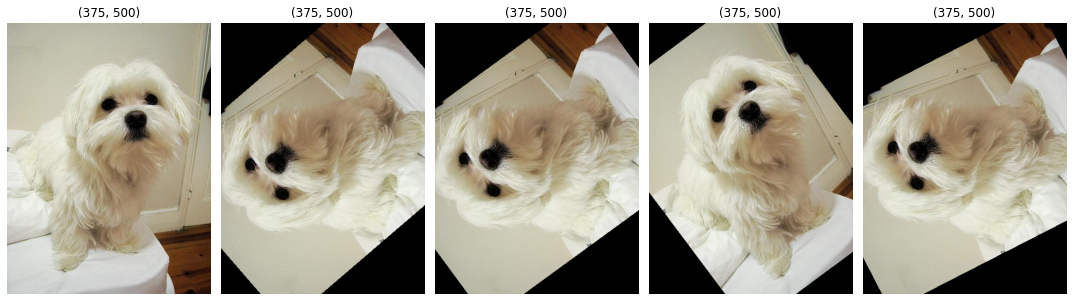

In [11]:
rotater = T.RandomRotation(degrees=(0, 180))
rotated_imgs = [rotater(orig_img) for _ in range(4)]
plot(rotated_imgs)

### RandomAffine
The [`RandomAffine`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomAffine) transform
performs random affine transform on an image.

- degrees
- translate=None
- scale=None
- shear=None
- interpolation=InterpolationMode.NEAREST
- fill=0,
- fillcolor=None
- resample=None


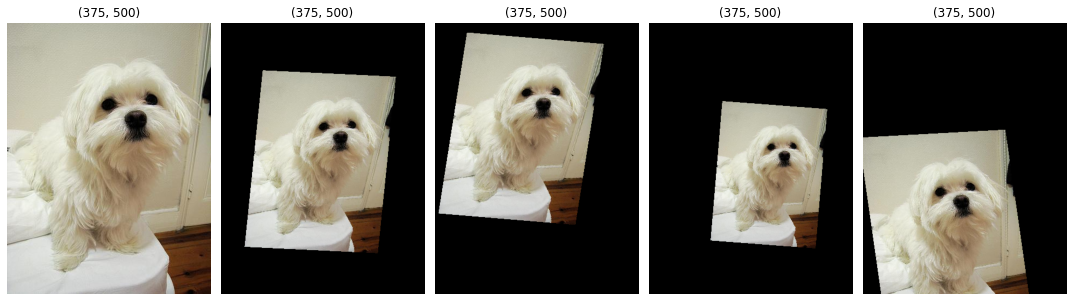

In [12]:
affine_transfomer = T.RandomAffine(degrees=(-5, 5), translate=(0.1, 0.3), scale=(0.5, 0.75), shear=(-5, 5))
affine_imgs = [affine_transfomer(orig_img) for _ in range(4)]
plot(affine_imgs)

### RandomCrop
The [`RandomCrop`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomCrop) transform
crops an image at a random location.



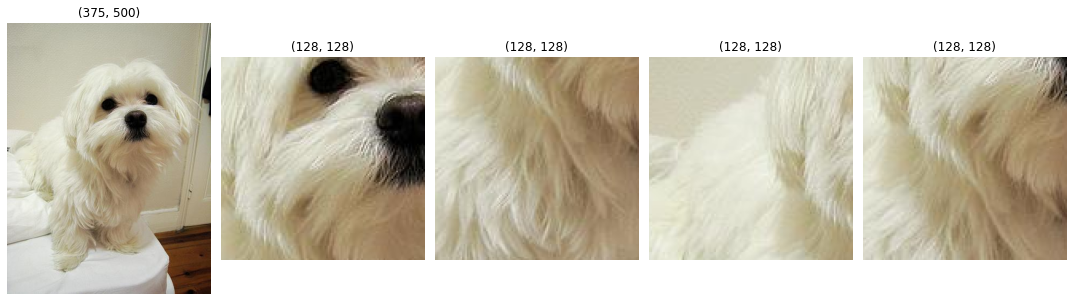

In [13]:
cropper = T.RandomCrop(size=(128, 128))
crops = [cropper(orig_img) for _ in range(4)]
plot(crops)

### RandomResizedCrop
The [`RandomResizedCrop`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomResizedCrop) transform
crops an image at a random location, and then resizes the crop to a given
size.

Crop a random portion of image and **resize** it to a given size.


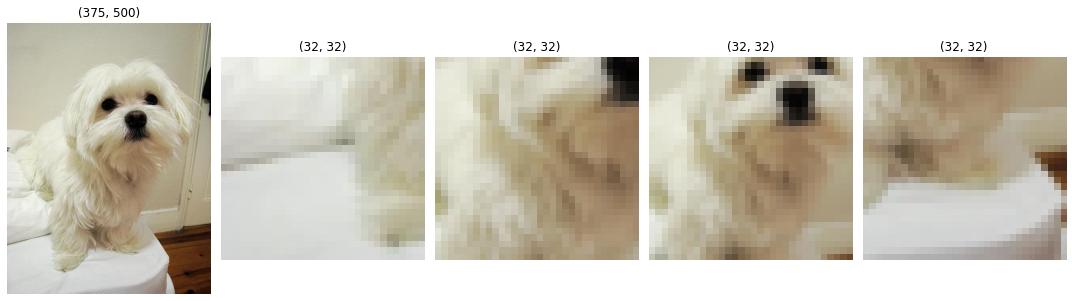

In [14]:
resize_cropper = T.RandomResizedCrop(size=(32, 32))
resized_crops = [resize_cropper(orig_img) for _ in range(4)]
plot(resized_crops)

### RandomInvert
The [`RandomInvert`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomInvert) transform
randomly inverts the colors of the given image.



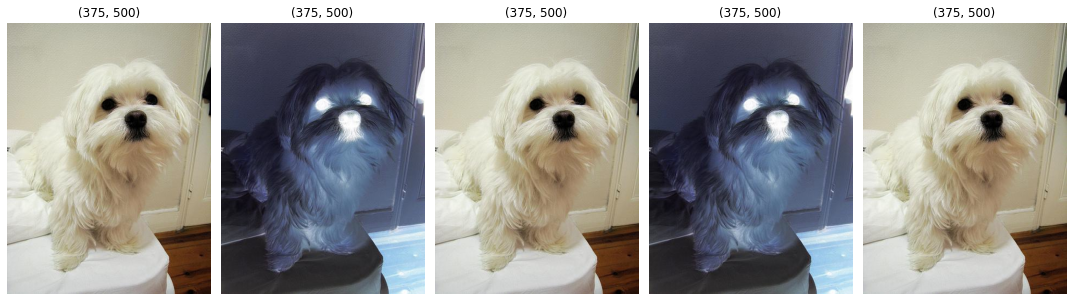

In [15]:
inverter = T.RandomInvert()
invertered_imgs = [inverter(orig_img) for _ in range(4)]
plot(invertered_imgs)

### RandomPosterize
The [`RandomPosterize`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomPosterize) transform
randomly posterizes the image by reducing the number of bits
of each color channel.



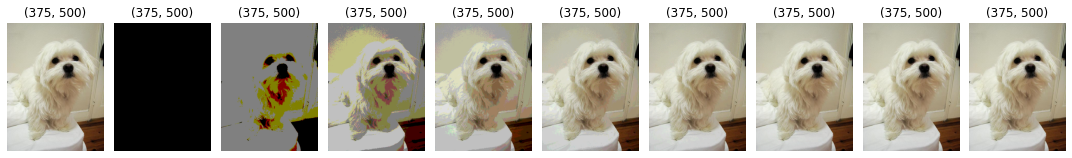

In [16]:
posterizer = T.RandomPosterize(bits=2)
posterized_imgs = [
    T.RandomPosterize(bits=bits_, p=1)(orig_img) 
    for bits_ in [0, 1, 2, 3, 4, 5, 6, 7, 8]
]
plot(posterized_imgs)

### RandomSolarize
The [`RandomSolarize`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomSolarize) transform
randomly solarizes the image by inverting all pixel values above
the threshold.



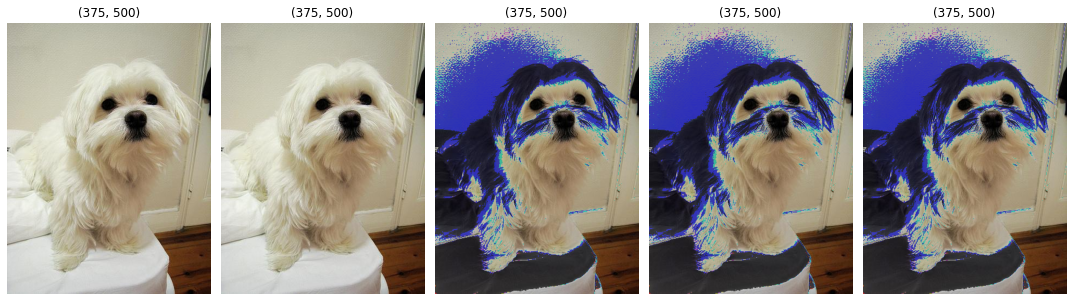

In [17]:
solarizer = T.RandomSolarize(threshold=192.0)
solarized_imgs = [solarizer(orig_img) for _ in range(4)]
plot(solarized_imgs)

### RandomAdjustSharpness
The [`RandomAdjustSharpness`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomAdjustSharpness)  transform
randomly adjusts the sharpness of the given image.



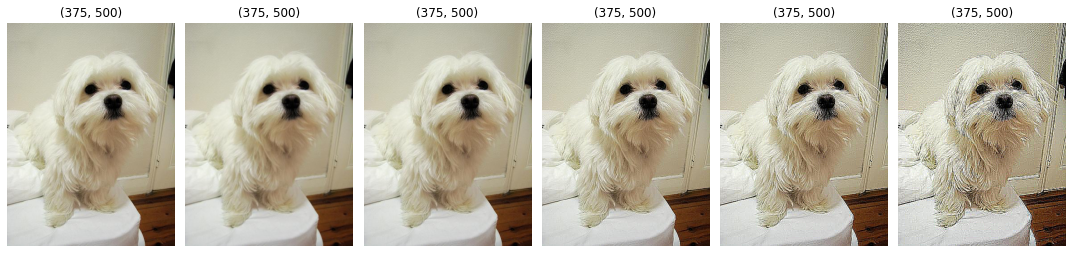

In [18]:
sharpened_imgs = [
    T.RandomAdjustSharpness(sharpness_factor=f, p=1)(orig_img) 
    for f in [0, 1, 5, 10, 20]
]
plot(sharpened_imgs)

### RandomAutocontrast
The [`RandomAutocontrast`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomAutocontrast) transform
randomly applies autocontrast to the given image.



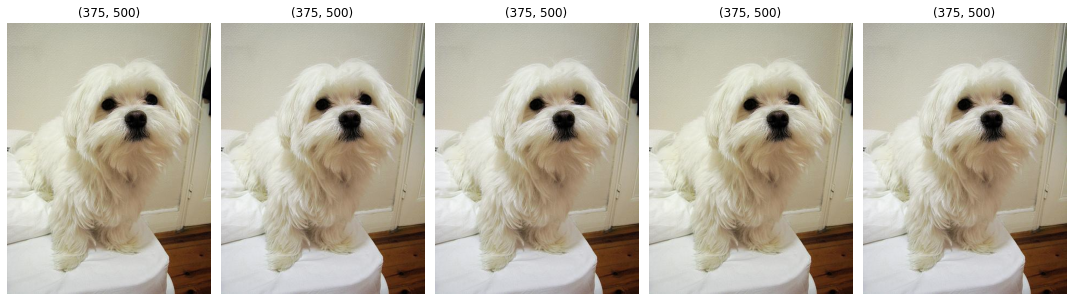

In [19]:
autocontraster = T.RandomAutocontrast()
autocontrasted_imgs = [autocontraster(orig_img) for _ in range(4)]
plot(autocontrasted_imgs)

### RandomEqualize
The [`RandomEqualize`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomEqualize) transform
randomly equalizes the histogram of the given image.



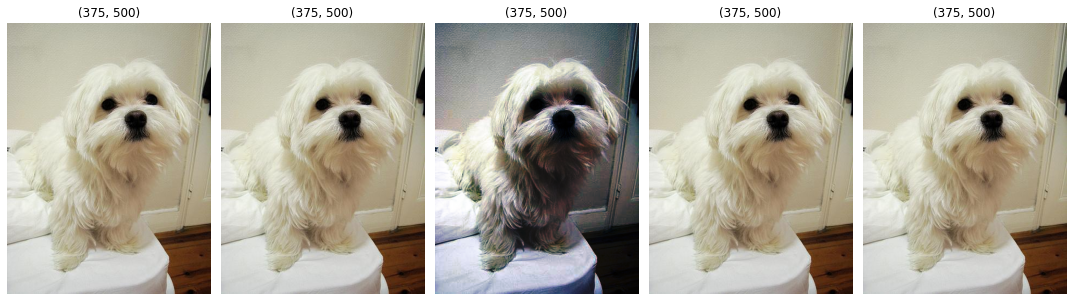

In [20]:
equalizer = T.RandomEqualize()
equalized_imgs = [equalizer(orig_img) for _ in range(4)]
plot(equalized_imgs)

### RandomHorizontalFlip
The [`RandomHorizontalFlip`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomHorizontalFlip) transform
performs horizontal flip of an image, with a given probability.

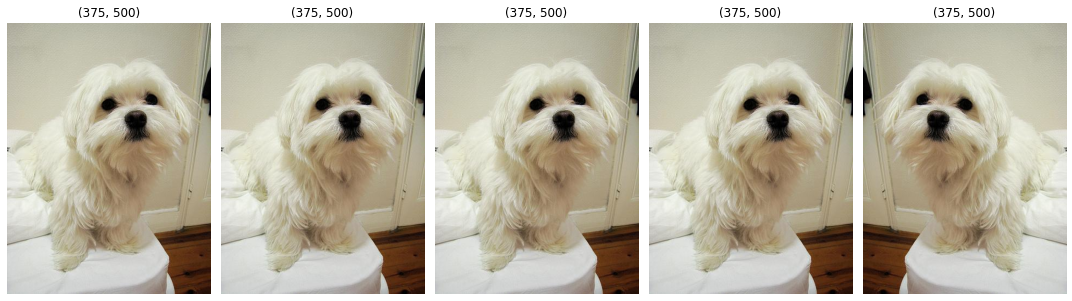

In [21]:
hflipper = T.RandomHorizontalFlip(p=0.5)
transformed_imgs = [hflipper(orig_img) for _ in range(4)]
plot(transformed_imgs)

### RandomVerticalFlip
The [`RandomVerticalFlip`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomVerticalFlip) transform
performs vertical flip of an image, with a given probability.



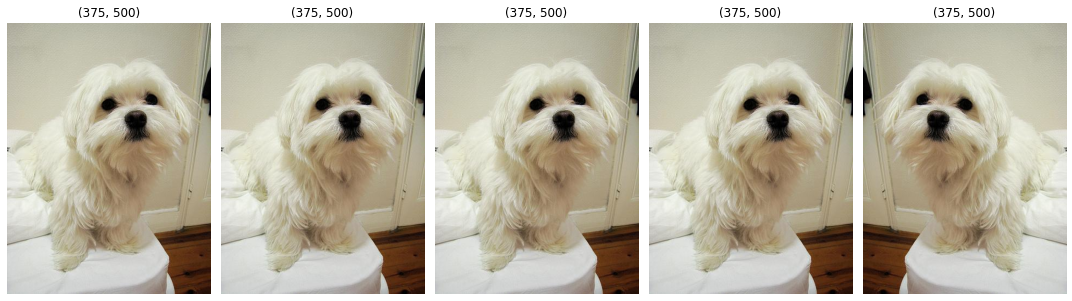

In [22]:
vflipper = T.RandomVerticalFlip(p=0.5)
plot(transformed_imgs)

### RandomApply
The [`RandomApply`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandomApply) transform
randomly applies a list of transforms, with a given probability.



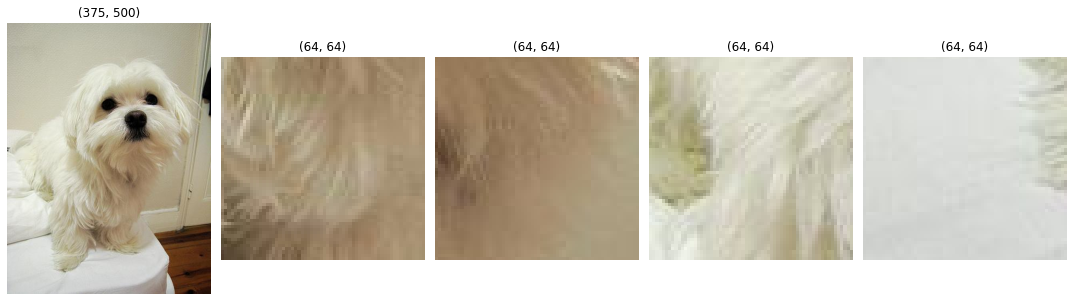

In [23]:
applier = T.RandomApply(transforms=[T.RandomCrop(size=(64, 64))], p=0.9)
transformed_imgs = [applier(orig_img) for _ in range(4)]
plot(transformed_imgs)

# Automatically Augmentation from Researches

### AutoAugment
The [`AutoAugment`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.AutoAugment) transform
automatically augments data based on a given auto-augmentation policy.

Available policies: https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.AutoAugmentPolicy 

Source Code: https://github.com/pytorch/vision/blob/adf8466ea53dc3f7a18c84c3b86ccde0c7cadb7a/torchvision/transforms/autoaugment.py#L94

Paper: https://arxiv.org/pdf/1805.09501.pdf


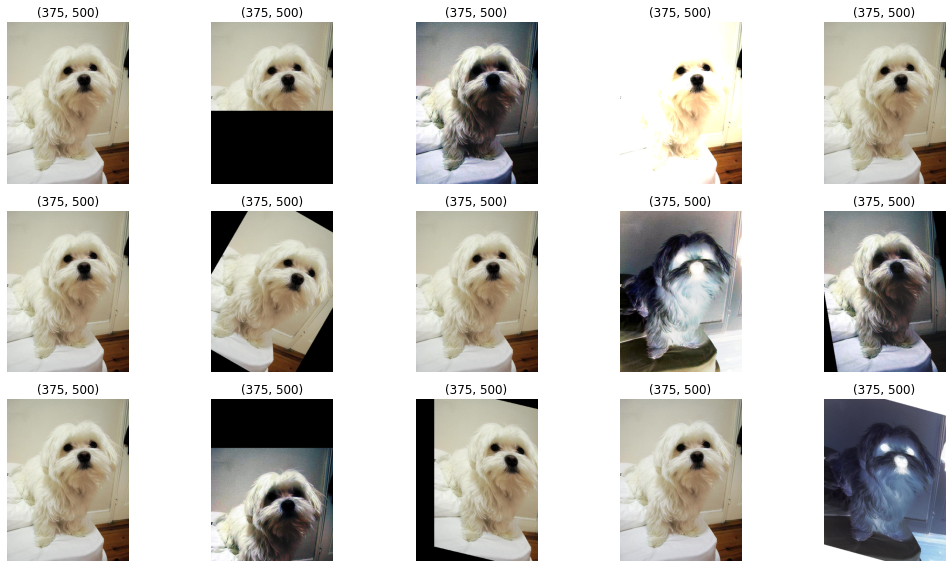

In [24]:
policies = [
    T.AutoAugmentPolicy.CIFAR10, 
    T.AutoAugmentPolicy.IMAGENET, 
    T.AutoAugmentPolicy.SVHN
]
augmenters = [T.AutoAugment(policy) for policy in policies]
imgs = [
    [augmenter(orig_img) for _ in range(4)]
    for augmenter in augmenters
]
row_title = [str(policy).split('.')[-1] for policy in policies]
plot(imgs)

### RandAugment
The [`RandAugment`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.RandAugment) transform automatically augments the data.

Paper: https://arxiv.org/pdf/1909.13719.pdf

Source Code: https://github.com/pytorch/vision/blob/adf8466ea53dc3f7a18c84c3b86ccde0c7cadb7a/torchvision/transforms/autoaugment.py#L276


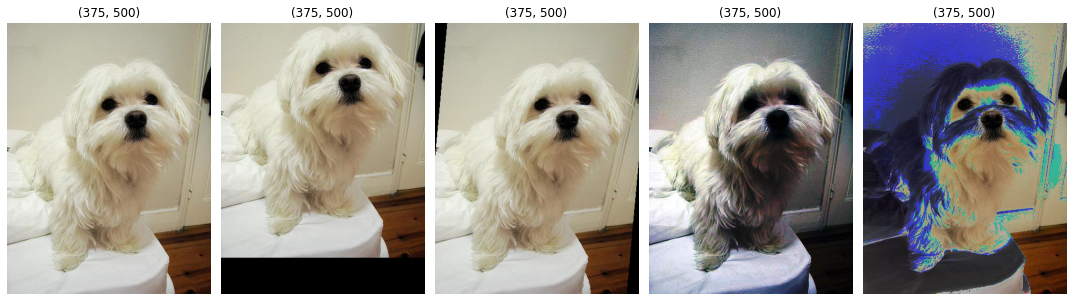

In [25]:
augmenter = T.RandAugment()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)

### TrivialAugmentWide
The [`TrivialAugmentWide`](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.TrivialAugmentWide) transform automatically augments the data.

Paper: https://arxiv.org/pdf/2103.10158.pdf

Source Code: https://github.com/pytorch/vision/blob/adf8466ea53dc3f7a18c84c3b86ccde0c7cadb7a/torchvision/transforms/autoaugment.py#L366


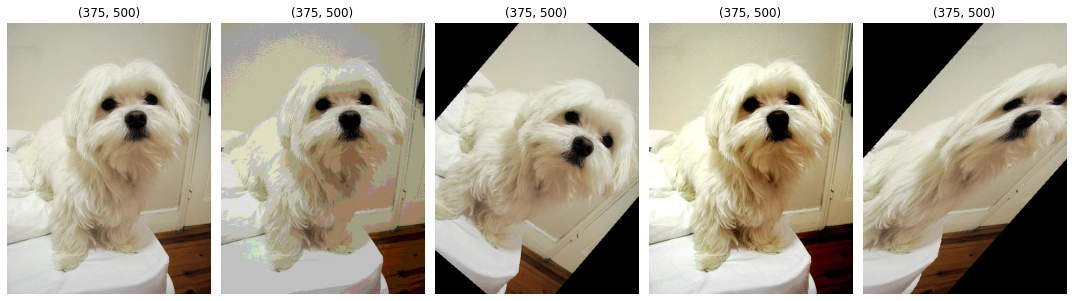

In [26]:
augmenter = T.TrivialAugmentWide()
imgs = [augmenter(orig_img) for _ in range(4)]
plot(imgs)